## Projeto - Fuzzy

#### Nome:         Turma:            Matrícula:

In [1]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control
import matplotlib

#### Criando antescedente (entrada/input)

/Users/thomasvictor/Developer/Inatel/INATEL-inteligencia-computacional/.venv/lib/python3.13/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


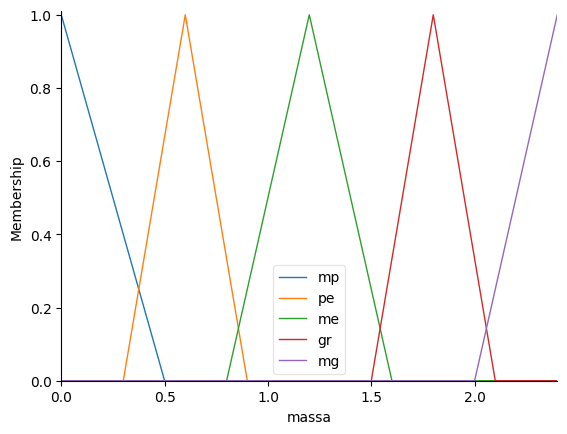

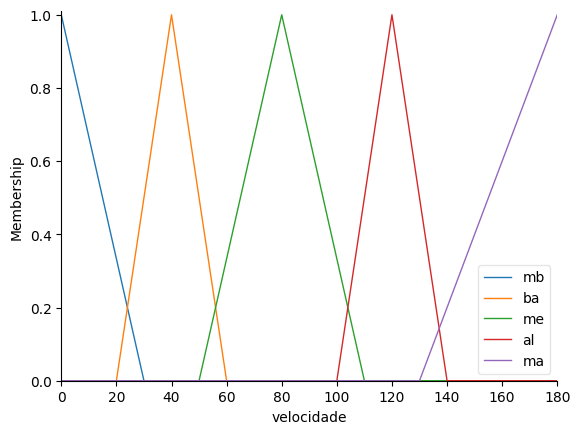

In [2]:
# Definindo universo de discurso e nome da variável
universo_velocidade = np.arange(0, 181, 1)
universo_massa = np.arange(0, 2.41, 0.01)

velocidade = control.Antecedent(universo_velocidade, "velocidade")
massa = control.Antecedent(universo_massa, "massa")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
velocidade["mb"] = fuzzy.trimf(universo_velocidade, [0, 0, 30])
velocidade["ba"] = fuzzy.trimf(universo_velocidade, [20, 40, 60])
velocidade["me"] = fuzzy.trimf(universo_velocidade, [50, 80, 110])
velocidade["al"] = fuzzy.trimf(universo_velocidade, [100, 120, 140])
velocidade["ma"] = fuzzy.trimf(universo_velocidade, [130, 180, 180])

massa["mp"] = fuzzy.trimf(universo_massa, [0.0, 0.0, 0.5])
massa["pe"] = fuzzy.trimf(universo_massa, [0.3, 0.6, 0.9])
massa["me"] = fuzzy.trimf(universo_massa, [0.8, 1.2, 1.6])
massa["gr"] = fuzzy.trimf(universo_massa, [1.5, 1.8, 2.1])
massa["mg"] = fuzzy.trimf(universo_massa, [2.0, 2.4, 2.4])


massa.view()
velocidade.view()

#### Criando consequent (saída/output)

In [3]:
# Universo da pressao
universo_pressao = np.arange(0, 1.01, 0.01)

pressao = control.Consequent(universo_pressao, "pressao")

pressao["mi"] = fuzzy.trimf(universo_pressao, [0.0, 0.0, 0.4])
pressao["me"] = fuzzy.trimf(universo_pressao, [0.3, 0.5, 0.7])
pressao["el"] = fuzzy.trimf(universo_pressao, [0.6, 1.0, 1.0])

#### Criando regras

In [4]:
# REGRA -> expressão X, resultado Y

regra1 = control.Rule(velocidade["mb"] & massa["mp"], pressao["mi"])
regra2 = control.Rule(velocidade["mb"] & massa["pe"], pressao["mi"])
regra3 = control.Rule(velocidade["mb"] & massa["me"], pressao["mi"])
regra4 = control.Rule(velocidade["mb"] & massa["gr"], pressao["me"])
regra5 = control.Rule(velocidade["mb"] & massa["mg"], pressao["me"])
regra6 = control.Rule(velocidade["ba"] & massa["mp"], pressao["mi"])
regra7 = control.Rule(velocidade["ba"] & massa["pe"], pressao["mi"])
regra8 = control.Rule(velocidade["ba"] & massa["me"], pressao["mi"])
regra9 = control.Rule(velocidade["ba"] & massa["gr"], pressao["me"])
regra10 = control.Rule(velocidade["ba"] & massa["mg"], pressao["me"])
regra11 = control.Rule(velocidade["me"] & massa["mp"], pressao["mi"])
regra12 = control.Rule(velocidade["me"] & massa["pe"], pressao["mi"])
regra13 = control.Rule(velocidade["me"] & massa["me"], pressao["me"])
regra14 = control.Rule(velocidade["me"] & massa["gr"], pressao["me"])
regra15 = control.Rule(velocidade["me"] & massa["mg"], pressao["me"])
regra16 = control.Rule(velocidade["al"] & massa["mp"], pressao["me"])
regra17 = control.Rule(velocidade["al"] & massa["pe"], pressao["me"])
regra18 = control.Rule(velocidade["al"] & massa["me"], pressao["el"])
regra19 = control.Rule(velocidade["al"] & massa["gr"], pressao["el"])
regra20 = control.Rule(velocidade["al"] & massa["mg"], pressao["el"])
regra21 = control.Rule(velocidade["ma"] & massa["mp"], pressao["me"])
regra22 = control.Rule(velocidade["ma"] & massa["pe"], pressao["me"])
regra23 = control.Rule(velocidade["ma"] & massa["me"], pressao["el"])
regra24 = control.Rule(velocidade["ma"] & massa["gr"], pressao["el"])
regra25 = control.Rule(velocidade["ma"] & massa["mg"], pressao["el"])

#### Criando sistema

In [5]:
# Adicionando regras ao controle
pressao_controle = control.ControlSystem([
    regra1, regra2, regra3, regra4, regra5,
    regra6, regra7, regra8, regra9, regra10,
    regra11, regra12, regra13, regra14, regra15,
    regra16, regra17, regra18, regra19, regra20,
    regra21, regra22, regra23, regra24, regra25
])

# Criando sistema com o controle de gorjeta
sistema = control.ControlSystemSimulation(pressao_controle)

Pressão calculada: 0.82 atm


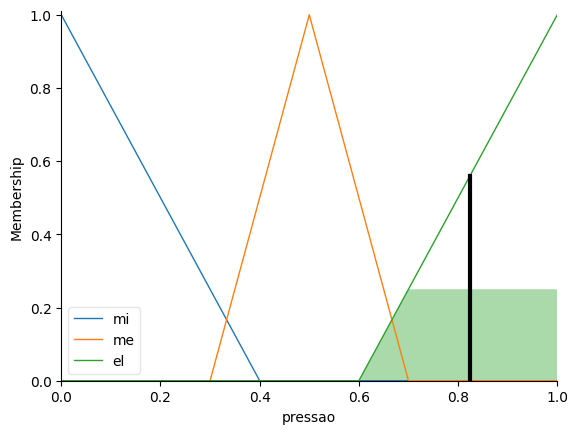

In [6]:
sistema.input["velocidade"] = 155
sistema.input["massa"] = 1.5

sistema.compute()

print(f"Pressão calculada: {sistema.output['pressao']:.2f} atm")
pressao.view(sim=sistema)